## Задание 1

Постройте лестницу из случайного полученного количества
ступенек при помощи Scatter Plots, при том, что длина каждой ступени
увеличивается в 2 раза по отношению к предыдущей.

In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

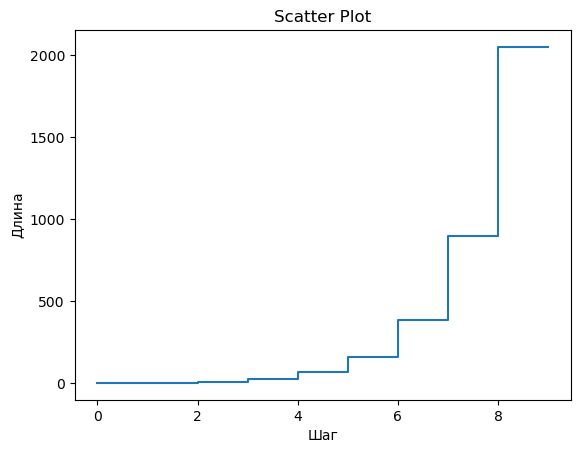

In [2]:
x, y = [0], [0]
step = 1

for i in range(random.randint(2, 10)):
    x.extend([i, i+1])
    y.extend([i*step, i*step])

    step *= 2

plt.plot(x, y)
plt.xlabel('Шаг')
plt.ylabel('Длина')
plt.title('Scatter Plot')
plt.show()

## Задание 2

При помощи Pie Charts создайте график, который отражает локации и как подгруппы мужчин и женщин.

In [3]:
df = pd.read_csv('data/diabetes_dataset.csv')
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


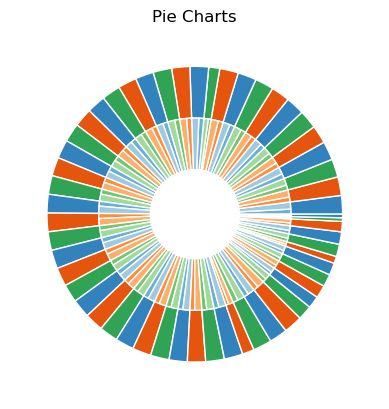

In [4]:
values = []
for location, group_data in df.groupby('location'):
    values.append([
        len(group_data[group_data.gender == 'Male']),
        len(group_data[group_data.gender == 'Female'])
    ])

size = 0.35
values = np.array(values)

cmap = plt.get_cmap('tab20c')
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

plt.pie(
    values.sum(axis=1),
    radius=1, colors=outer_colors, wedgeprops=dict(width=size, edgecolor='w')
)
plt.pie(
    values.flatten(),
    radius=1-size, colors=inner_colors, wedgeprops=dict(width=size, edgecolor='w')
)

plt.title('Pie Charts')
plt.show()

## Задание 3

Покажите зависимость между ростом, весом и возрастом ваших однокурсников с помощью Bubble plot и Box plot.

In [5]:
df = pd.read_csv('data/basic_details.csv')
df.head()

,Height,Weight,Age,Groups
0,150,76,25,A
1,143,64,27,A
2,123,86,28,A
3,165,35,43,B
4,176,86,63,B


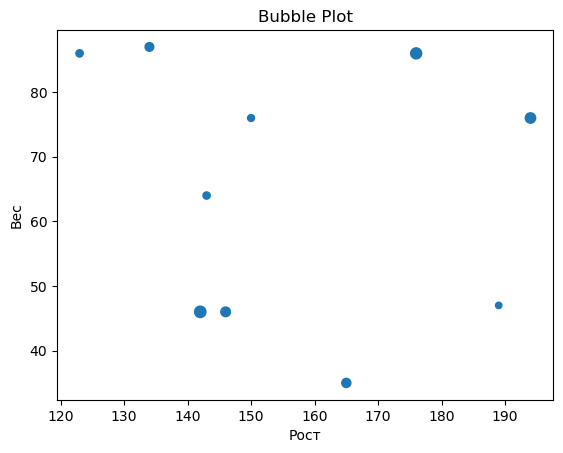

In [6]:
plt.scatter(df['Height'], df['Weight'], df['Age'])
plt.xlabel('Рост')
plt.ylabel('Вес')
plt.title('Bubble Plot')
plt.show()

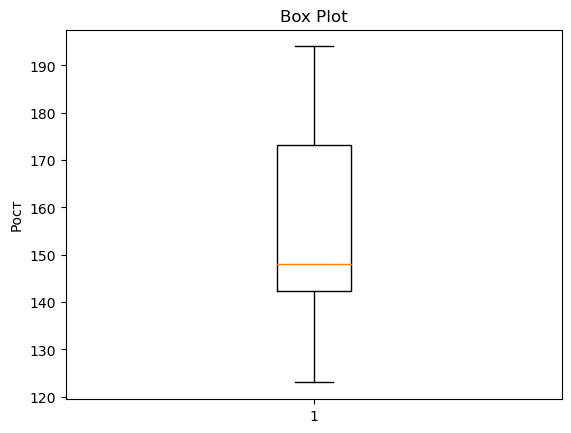

In [7]:
plt.boxplot(df['Height'])
plt.ylabel('Рост')
plt.title('Box Plot')
plt.show()

## Дополнительное задание

In [8]:
df = pd.read_csv('data/diabetes_dataset.csv')
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


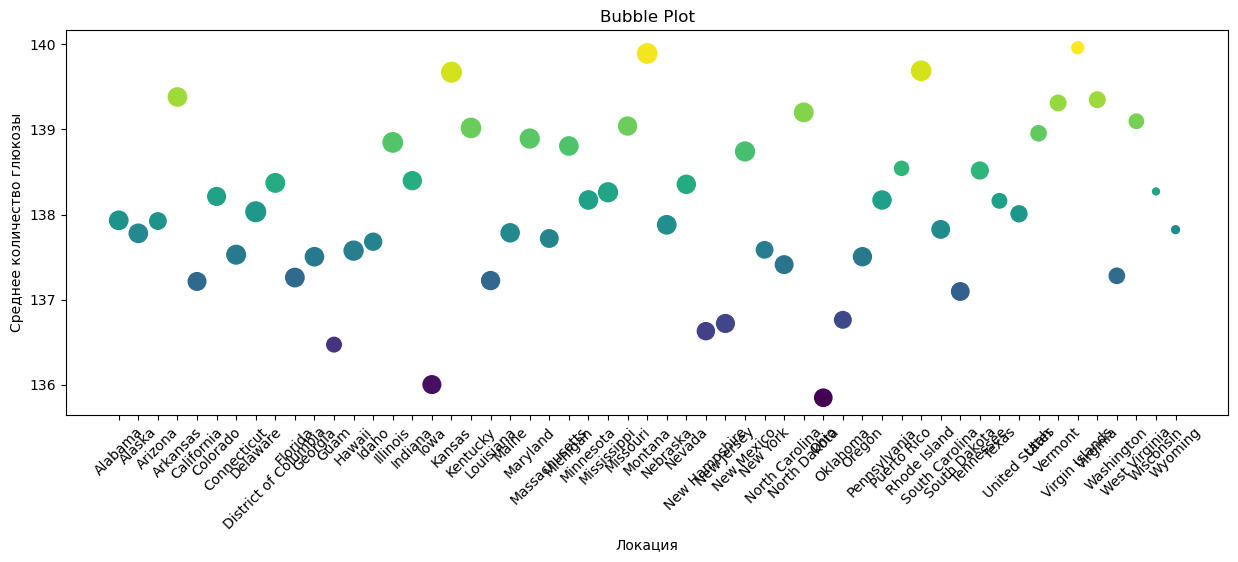

In [9]:
locations = []
glucoses_mean = []
diabetes_counts = []

for location, group_data in df.groupby('location'):
    locations.append(location)
    glucoses_mean.append(group_data['blood_glucose_level'].mean())
    diabetes_counts.append(len(group_data[group_data.diabetes == 1]))

plt.figure(figsize=(15, 5))
plt.scatter(locations, glucoses_mean, s=diabetes_counts, c=glucoses_mean)
plt.xlabel('Локация')
plt.ylabel('Среднее количество глюкозы')
plt.title('Bubble Plot')
plt.xticks(rotation=45)
plt.show()